# Simple model of infection

Each individual infects $c$ new people each day.

$I_{n+1} = I_n + (c I_n) = I_n(1 + c)$

So

$I_{n+1} = \lambda I_n$,  where $\lambda := 1 + c$ -- **growth rate**

and $I_0 = 1$

In [1]:
I0 = 1

1

In [2]:
I_0 = 1

1

In [3]:
I₀ = 1   # \_0 <TAB>

1

In [4]:
c = 0.01  # average no. of people that each individual infects on each day

0.01

In [8]:
λ = 1 + c  # \lambda <TAB>

1.01

In [5]:
λ = 1 + c; 

`;` suppresses output

In [6]:
I_1 = λ * I_0

1.01

In [7]:
I_2 = λ * I_1

1.0201

In [8]:
I_3 = λ * I_2

1.030301

## Arrays

In [9]:
T = 10  # final time 

I = zeros(T)  

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [10]:
I

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [11]:
I[1]

0.0

In [17]:
I[1:2]

2-element Array{Float64,1}:
 0.0
 0.0

In [12]:
I = zeros(Int64, T)

10-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [13]:
I = zeros(T)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
I[1] = I_0   # Could use OffsetArrays.jl -- enables arbitrary indexing

1

In [15]:
for n in 1:T-1
    I[n+1] = λ * I[n]
    @show n, I[n]
end

# for loops do not return anything so running a for loop does not output

(n, I[n]) = (1, 1.0)
(n, I[n]) = (2, 1.01)
(n, I[n]) = (3, 1.0201)
(n, I[n]) = (4, 1.030301)
(n, I[n]) = (5, 1.04060401)
(n, I[n]) = (6, 1.0510100501)
(n, I[n]) = (7, 1.061520150601)
(n, I[n]) = (8, 1.0721353521070098)
(n, I[n]) = (9, 1.08285670562808)


In [16]:
I

10-element Vector{Float64}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

In [17]:
using Plots

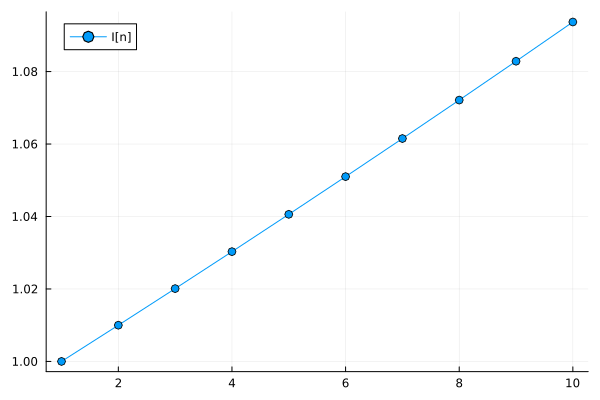

In [21]:
plot(I, m=:o, label="I[n]", legend=:topleft)

In [22]:
T = 20

I = zeros(I)
I[1] = I_0

for n in 1:T-1
    I[n+1] = λ * I[n]
    @show n, I[n]
end

plot(I)

MethodError: MethodError: no method matching zeros(::Vector{Float64})
Closest candidates are:
  zeros(!Matched::Type{T}, !Matched::Union{Integer, AbstractUnitRange}...) where T at array.jl:584
  zeros(!Matched::Tuple{Vararg{Union{Integer, AbstractUnitRange}}}) at array.jl:585
  zeros(!Matched::Type{T}, !Matched::Tuple{}) where T at array.jl:592
  ...

## Functions

In [23]:
function run_infection(T=20)  # default

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = λ * I[n]
    end

    return I
end

run_infection (generic function with 2 methods)

In [24]:
methods(run_infection)

# 2 methods for generic function "run_infection":
[1] run_infection() in Main at /Users/soutrikbanerjee/Documents/GitHub2/soutrikbanerjee/6S083/lectures/live/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X41sZmlsZQ==.jl:1
[2] run_infection(T) in Main at /Users/soutrikbanerjee/Documents/GitHub2/soutrikbanerjee/6S083/lectures/live/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X41sZmlsZQ==.jl:1

In [25]:
run_infection(10)

10-element Vector{Float64}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

In [28]:
I_result = run_infection(10);

In [29]:
I_result

10-element Vector{Float64}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

**Always separate data generation from plotting!**

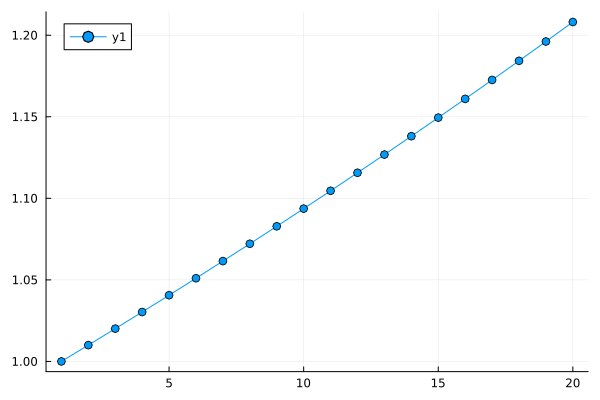

In [30]:
I_result = run_infection(20)

plot(I_result, m=:o)

In [31]:
using Interact

In [32]:
end_T = 1000
@manipulate for T in slider(1:end_T, value=1)
    I_result = run_infection(T)

    plot(I_result, m=:o)
    
    xlims!(0, end_T)
    ylims!(0, 10)
end

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 1000, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/soutrikbanerjee/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/soutrikbanerjee/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/soutrikbanerjee/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/soutrikbanerjee/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/soutrikbanerjee/.julia/packages/Interact/PENUy/src/../assets/bulma.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016585e120, Task (runnable) @0x000000016585e120), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 4444269840, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"

## Exponential growth

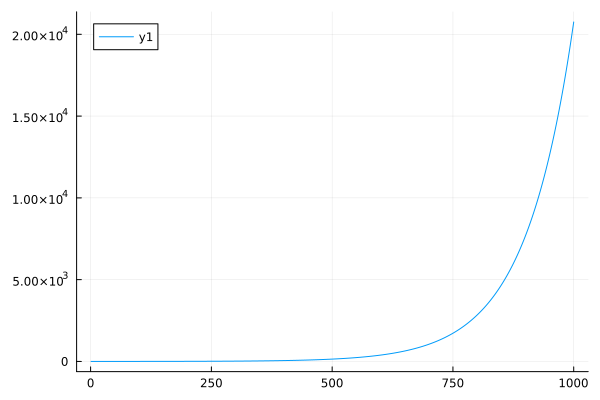

In [33]:
plot(run_infection(1000))

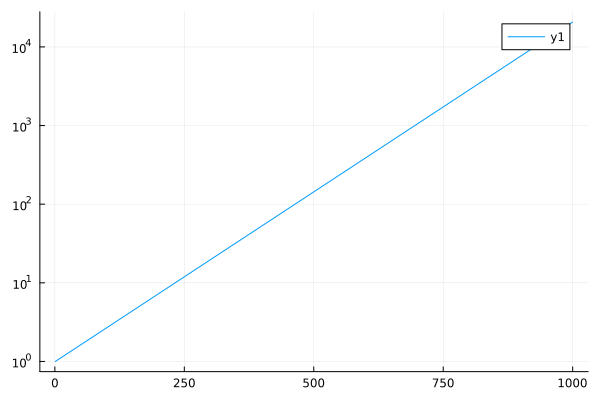

In [34]:
plot(run_infection(1000), yscale=:log10)

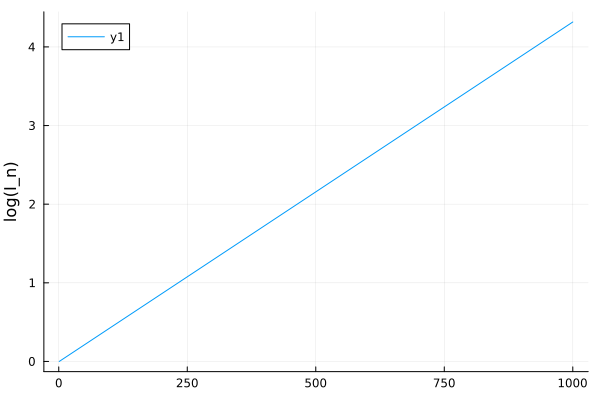

In [36]:
I_result = run_infection(1000)

plot(log10.(I_result))   # log of each element in I_result
ylabel!("log(I_n)")

$\log(I_n) = a n + b$

Take exponentials of both sides:

$I_n = \exp(an + b) = C e^{a n}$

Solve $I_{n+1} = \lambda I_n$:

$I_n = \lambda^n I_0$

$\log(\lambda^n) = n \log(\lambda)$

## Logistic growth

Exp growth is unrealistic: Assumes that there are always more people to infect -- wrong (finite population).

$I_{n+1} = I_n + c I_n$

Each individual will be in contact with a fraction $\alpha$ of the population. At each contact there will a probability $p$ that you infect each person.

Number of contacts = $\alpha N$

So $c = p \alpha N$

Original model:

$I_{n+1} = I_n + (p \alpha N) I_n$  -- good approximation when almost everybody still susceptible

New model:

Can only infect uninfected people!

$I_{n+1} = I_n + (p \alpha S_n) I_n$

$I_{n+1} = I_n + [p \alpha (N - I_n)] I_n = f(I_n)$

$I_{n+1} = I_n + \beta(I_n, S_n) I_n = f(I_n)$

In [37]:
p = 0.02
α = 0.01
N = 1000

β(I, S) = p * α * S

function run_infection(T=20)  # default

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = I[n] + β(I[n], N - I[n]) * I[n]
    end

    return I
end

run_infection (generic function with 2 methods)

In [38]:
I = run_infection(20)

20-element Vector{Float64}:
  1.0
  1.1998
  1.439472095992
  1.7269520992073721
  2.071746046338255
  2.4852368292698026
  2.9810489147042514
  3.57548136711873
  4.288020827141153
  5.141947568046585
  6.165049156697394
  7.390457421815974
  8.857625133998434
 10.613458656195233
 12.713621286504926
 15.224018310562577
 18.222467825971023
 21.80054972443152
 26.065606875660343
 31.14284507843312

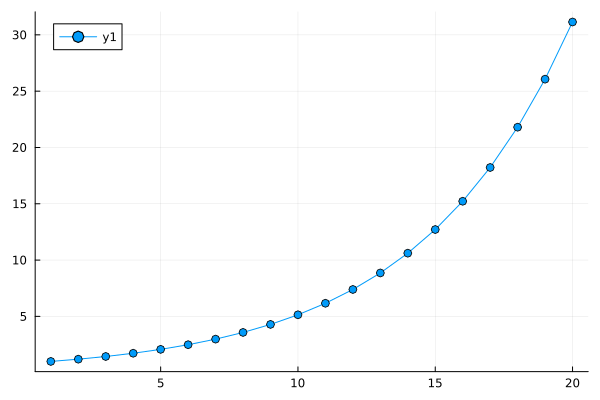

In [39]:
plot(I, m=:o)

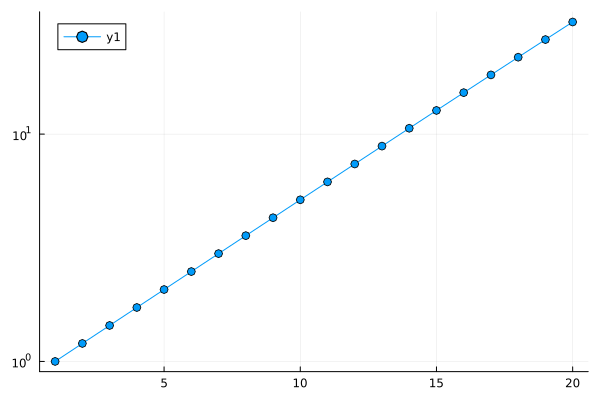

In [40]:
plot(I, m=:o, yscale=:log10)

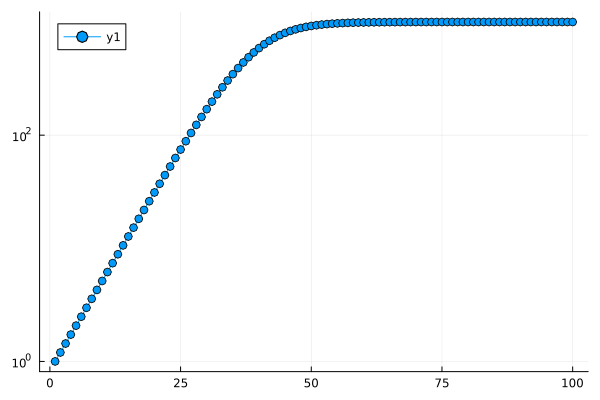

In [41]:
I = run_infection(100)
plot(I, m=:o, yscale=:log10)

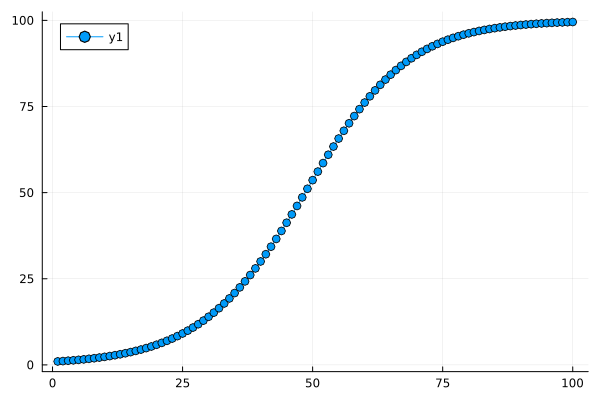

In [42]:
p = 0.01
α = 0.1
N = 100

I = run_infection(100)
plot(I, m=:o)

**Sigmoid** shape -- S-shaped

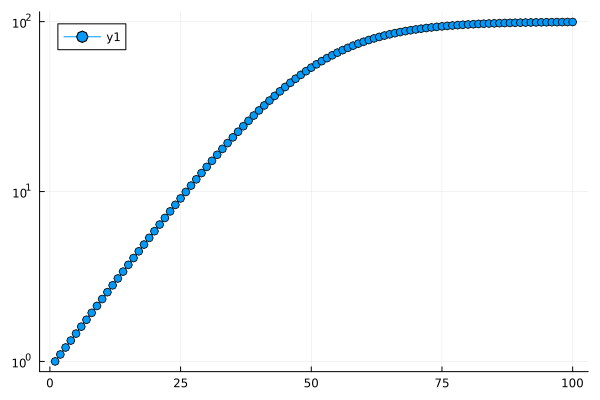

In [43]:
plot(I, m=:o, yscale=:log10)

"Logistic-type growth"

$I_{n+1} = \lambda I_n$

## More realism: Heterogeneity of individuals or groups

Idea: Instead of modelling population globally, model each individual

"Patch model": Local patches where population is **well mixed**

Network model: Links between nodes

Exponential growth:

$I_{n+1} = \lambda_n I_n$  -- growth rate changes in time

In [44]:
rand()

0.6017415417155155

In [45]:
rand()

0.8410096405230159

In [46]:
rand()

0.6709910539003555

www.random.org

In [47]:
randn()

-0.5501593554740773

In [ ]:
p = 0.02
α = 0.01
N = 1000

function run_infection(c_average=1.1, T=20)  # default

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        c = c_average + 0.1*randn()
        I[n+1] = I[n] + c * I[n]
    end

    return I
end

run_infection (generic function with 3 methods)

In [49]:
c_average = 1.1

cs = [c_average + 0.1*randn() for i in 1:100]

100-element Vector{Float64}:
 1.1155304000768858
 1.025689097551785
 1.1956479475061494
 1.112573589860367
 1.1082356980127521
 1.1270130434909256
 0.9936460821387106
 1.0392101490565173
 0.9700401713115089
 1.1196853026844014
 ⋮
 1.1831027879250786
 1.185856885378206
 1.1445500433550548
 1.120070386275176
 1.0474725343068565
 1.082588241448479
 1.0094160687719855
 1.0783719542700794
 1.0331079779117684

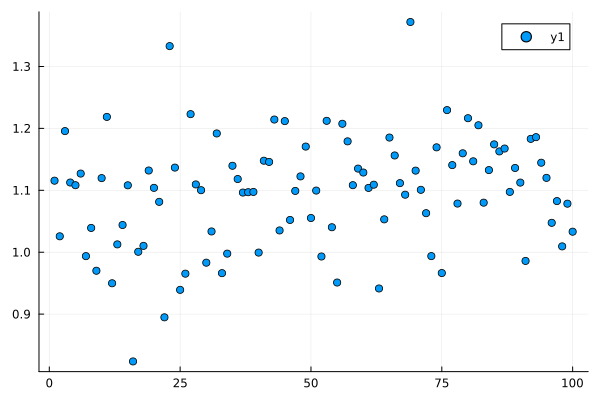

In [50]:
scatter(cs)